## Problem 3: Adding polynomial features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the auto-mpg dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/auto.csv'
data = pd.read_csv(url)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


The data concerns city-cycle fuel consumption in miles per gallon (mpg).

**Part 1:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight}
$$

to the data.

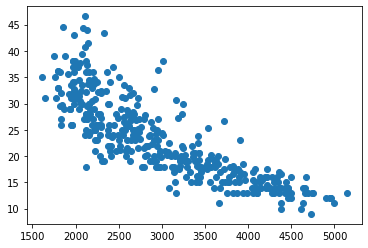

In [3]:
weight=data.weight
mpg=data.mpg
plt.scatter(weight,mpg)

Plot the data points and the fitted model

In [4]:
#target vector
mpg=mpg.to_numpy()
# feature Matrix
num_rows=len(data)
X=np.ones((num_rows,2))
X[:,1]=weight.to_numpy()

In [5]:
def func(x,theta):
    return theta[0]+theta[1]*x

In [6]:
theta=np.linalg.lstsq(X,mpg,rcond=None)[0]
theta

array([ 4.62165245e+01, -7.64734254e-03])

In [7]:
num_points=1000
x_plot=np.linspace(1500,6000,num_points)
y_plot=func(x_plot,theta)

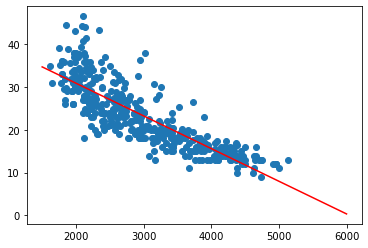

In [8]:
plt.scatter(weight,mpg)
plt.plot(x_plot,y_plot,color='r')

**Part 2:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2\cdot \mathrm{weight}^2
$$

to the data.

In [9]:
def func(weight,theta):
    return theta[0]+theta[1]*weight+theta[2]*(weight**2)

In [10]:
X=np.ones((num_rows,3))
X[:,1]=weight.to_numpy()
X[:,2]=(weight.to_numpy())**2

In [11]:
theta=np.linalg.lstsq(X,mpg,rcond=None)[0]
theta

array([ 6.22554740e+01, -1.84956106e-02,  1.69656507e-06])

In [12]:
num_points=1000
x_plot=np.linspace(1500,6000,num_points)
y_plot=func(x_plot,theta)

Plot the data points and the fitted model

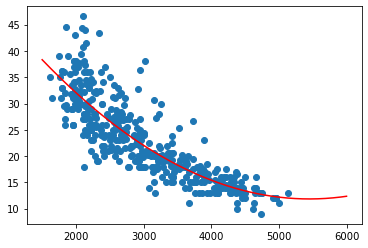

In [13]:
plt.scatter(weight,mpg)
plt.plot(x_plot,y_plot,color='r')

**Part 3:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2 \cdot \mathrm{horsepower}
$$

to the data.

In [14]:
def func(weight,power,theta):
    return theta[0]+theta[1]*weight+theta[2]*power

In [15]:
weight=data.weight
power=data.horsepower

In [16]:
num_rows=len(mpg)
matrix=np.ones((num_rows,3))
matrix[:,1]=weight.to_numpy()
matrix[:,2]=power.to_numpy()
matrix

array([[1.000e+00, 3.504e+03, 1.300e+02],
       [1.000e+00, 3.693e+03, 1.650e+02],
       [1.000e+00, 3.436e+03, 1.500e+02],
       ...,
       [1.000e+00, 2.295e+03, 8.400e+01],
       [1.000e+00, 2.625e+03, 7.900e+01],
       [1.000e+00, 2.720e+03, 8.200e+01]])

In [17]:
# your code here
theta=np.linalg.lstsq(matrix,mpg,rcond= None)[0]
theta

array([ 4.56402108e+01, -5.79415736e-03, -4.73028631e-02])

In [18]:
mpg_pred=func(weight.to_numpy(),power.to_numpy(),theta) 

Plot the data points and the fitted model

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


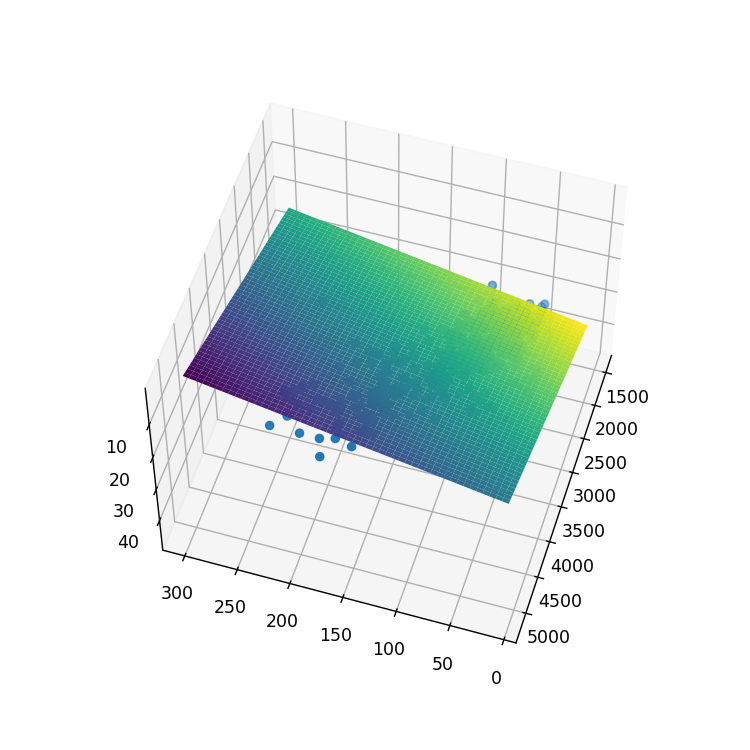

In [20]:
numpoints=1000


fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')


weight_plot=np.linspace(1500,5000,numpoints)
power_plot=np.linspace(10,300,numpoints)

W_plot,P_plot = np.meshgrid(weight_plot,power_plot)

Z_plot = func(W_plot,P_plot,theta)
ax.scatter(weight,power,mpg)
ax.plot_surface(W_plot,P_plot,Z_plot,cmap='viridis')

**Part 3:** Fit a model

$$
\mathrm{mpg} = \theta_0 + \theta_1\cdot \mathrm{weight} + \theta_2\cdot\mathrm{horsepower} + \theta_3\cdot\mathrm{weight}^2
+ \theta_4\cdot\mathrm{weight}\cdot\mathrm{horsepower} + \theta_5\cdot\mathrm{horsepower}^2
$$

to the data.

In [21]:
def func(weight,power,theta):
    return theta[0]+(theta[1]*weight)+(theta[2]*power)+(theta[3]*(weight**2))+(theta[4]*weight*power)+(theta[5]*(power**2))

Plot the data points and the fitted model

In [22]:
matrix=np.ones((num_rows,6))
matrix[:,1]=weight.to_numpy()
matrix[:,2]=power.to_numpy()
matrix[:,3]=(weight.to_numpy())**2
matrix[:,4]=(power.to_numpy())*(weight.to_numpy())
matrix[:,5]=(power.to_numpy())**2
matrix

array([[1.0000000e+00, 3.5040000e+03, 1.3000000e+02, 1.2278016e+07,
        4.5552000e+05, 1.6900000e+04],
       [1.0000000e+00, 3.6930000e+03, 1.6500000e+02, 1.3638249e+07,
        6.0934500e+05, 2.7225000e+04],
       [1.0000000e+00, 3.4360000e+03, 1.5000000e+02, 1.1806096e+07,
        5.1540000e+05, 2.2500000e+04],
       ...,
       [1.0000000e+00, 2.2950000e+03, 8.4000000e+01, 5.2670250e+06,
        1.9278000e+05, 7.0560000e+03],
       [1.0000000e+00, 2.6250000e+03, 7.9000000e+01, 6.8906250e+06,
        2.0737500e+05, 6.2410000e+03],
       [1.0000000e+00, 2.7200000e+03, 8.2000000e+01, 7.3984000e+06,
        2.2304000e+05, 6.7240000e+03]])

In [23]:
# your code here
theta=np.linalg.lstsq(matrix,mpg,rcond= None)[0]
theta

array([ 6.34053093e+01, -1.01908547e-02, -2.64565957e-01,  2.43801586e-07,
        3.59378672e-05,  2.82005033e-04])

In [24]:
mpg_pred=func(weight.to_numpy(),power.to_numpy(),theta) 

<IPython.core.display.Javascript object>


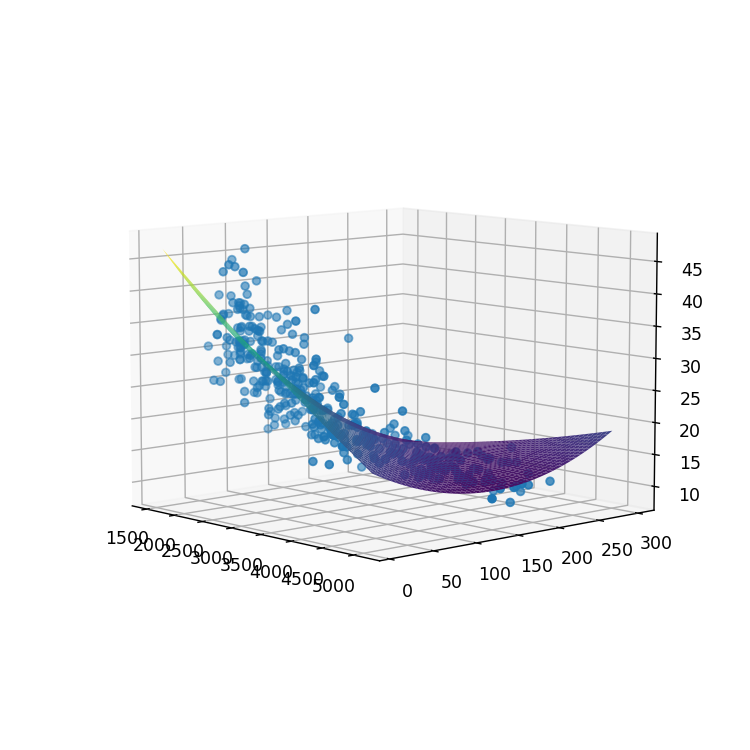

In [25]:
numpoints=1000

mpg_plot=func(weight_plot,power_plot,theta)
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')


weight_plot=np.linspace(1500,5000,numpoints)
power_plot=np.linspace(10,300,numpoints)

W_plot,P_plot = np.meshgrid(weight_plot,power_plot)

Z_plot = func(W_plot,P_plot,theta)

ax.scatter(weight,power,mpg)

ax.plot_surface(W_plot,P_plot,Z_plot,cmap='viridis')